# Прогнозирование качества извлечение оксида железа из руды с помощью машинного обучения
Железные руды - это горные породы и минералы, из которых можно экономически выгодно извлечь металлическое железо. Руды обычно богаты оксидами железа и различаются по цвету от темно-серого, ярко-желтого или темно-фиолетового до ржаво-красного. Железо обычно находится в форме магнетита, гематита, гетита, лимонита или сидерита.

Руды, содержащие очень большое количество    или магнетита (более 60% железа), известны как "природная руда" или "руда прямого отгрузки". Типичный магнетитовый железорудный концентрат содержит примеси кремнезема в количестве 3-7%.

Кремнезем является основной примесью в железной руде, и, прогнозируя содержание примесей в руде, мы можем помочь инженерам на заводе проводить необходимые расчеты на ранних стадиях производства.

Высокое содержание кремнезема может привести к большому объему шлака. Это, в свою очередь, приводит загрязнению окружающей среды.
Следовательно, необходимо знать, сколько % кремнезема (примеси) содержится в рудном концентрате.

В этом практическом проекте мы построим и обучим модель для эффективного прогнозирования процента кремнезема в руде. Данные были полученный на [Kaggle](https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process). 
В этом практическом проекте мы выполним следующие этапы:
* Импорт библиотек/наборов данных
* Подготовка данных
* Выполняем визуализацию данных
* Строим и оцениваем модель

### Импорт библиотек/наборов данных

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette("pastel")

In [2]:
df = pd.read_csv('data.csv')
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


* **date** - Дата и время измерения
* **% Iron Feed** - % железа, которое поступает из железной руды, подаваемой во флотационные камеры
* **% Silica Feed** - % кремнезема (примеси), который поступает из железной руды, подаваемой во флотационные камеры
* **Starch Flow** - Количество крахмала (реагента), добавленного в ячейку, измеряется в м^3/ч
* **Amina Flow** - Амина (реагент). Расход измеряется в м3/ч
* **Ore Pulp Flow** - Расход рудной пульпы (т/ч)
* **Ore Pulp pH** - Шкала pH от 0 до 14
* **Ore Pulp Density** - Шкала плотности от 1 до 3 кг/см³
* **Flotation Column (num) Air Flow** - Расход воздуха, поступающего во флотационную камеру, измеряется в Нм³/ч
* **Flotation Column (num) Level** - Уровень флюса во флотационной ячейке, измеренный в мм (миллиметрах)
* **% Iron Concentrate** - % железа, который показывает, сколько железа получено в конце процесса флотации (0-100%, лабораторное измерение)
* **% Silica Concentrate** - % кремнезема, который показывает, сколько железа будет получено в конце процесса флотации (0-100%, лабораторное измерение)

### Подготовка данных

In [3]:
# Для данного практического проекта нам не потребуется date, поэтому мы ее удаляем
df.drop(["date"], axis=1, inplace=True)

In [4]:
# Заменяем запятые на точки
df = df.apply(lambda x: x.str.replace(',','.'))

In [5]:
# Меняем тип данных в датафрейме
df = df.apply(pd.to_numeric)

In [6]:
# Выводим информацию о датафрейме и проверяем правильно ли произошла конвертация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [7]:
# Выводим статистическую информацию
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [8]:
# Делим данные на X и y
X, y = df.drop("% Silica Concentrate", axis=1), df[["% Silica Concentrate"]].values.flatten()

### Выполняем визуализацию данных

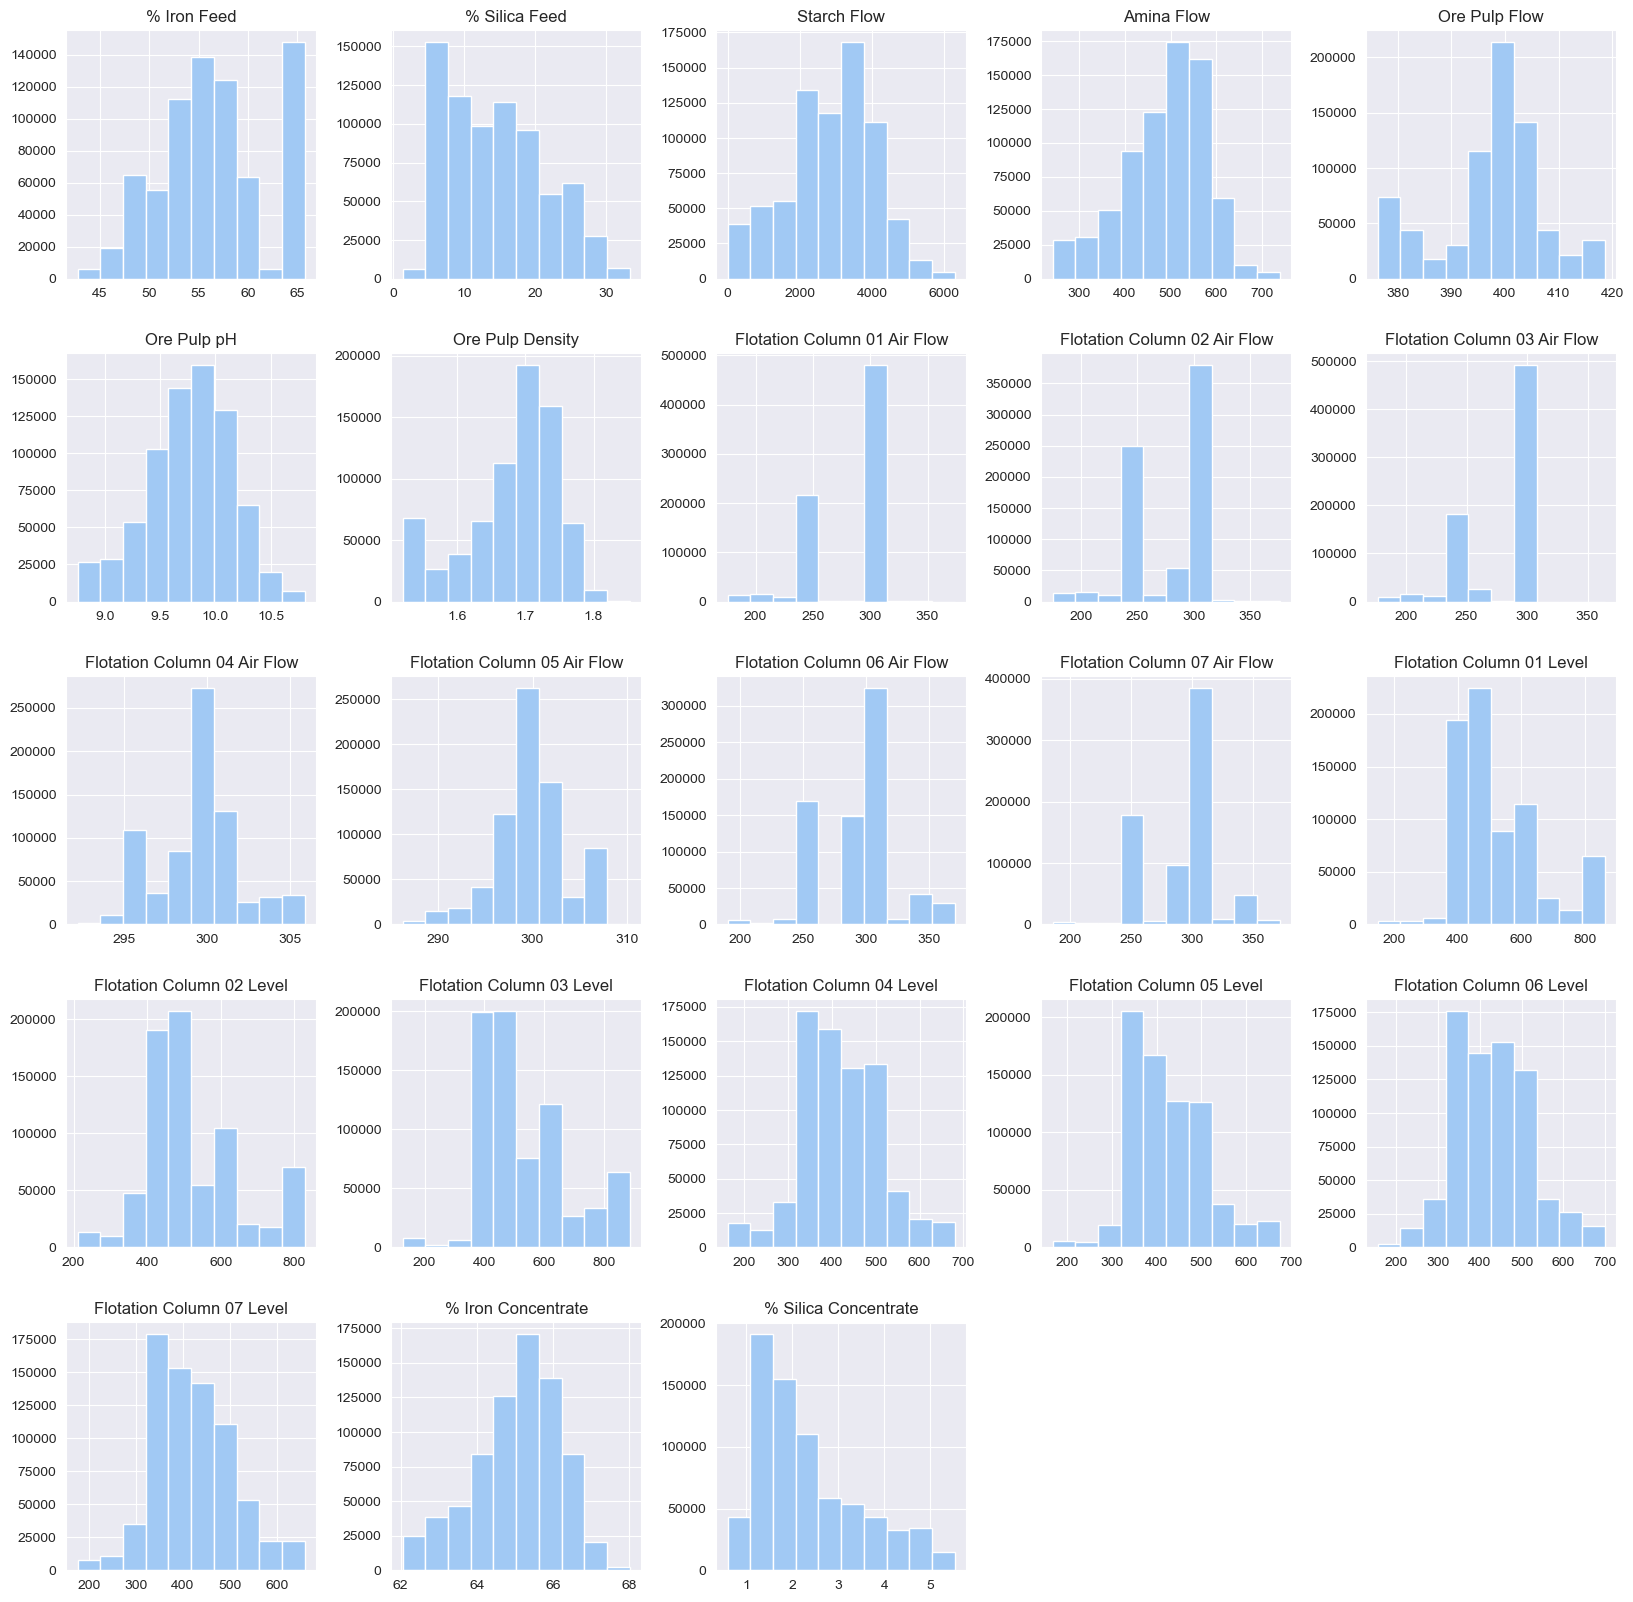

In [9]:
df.hist(figsize= (20,20))
plt.show("png")

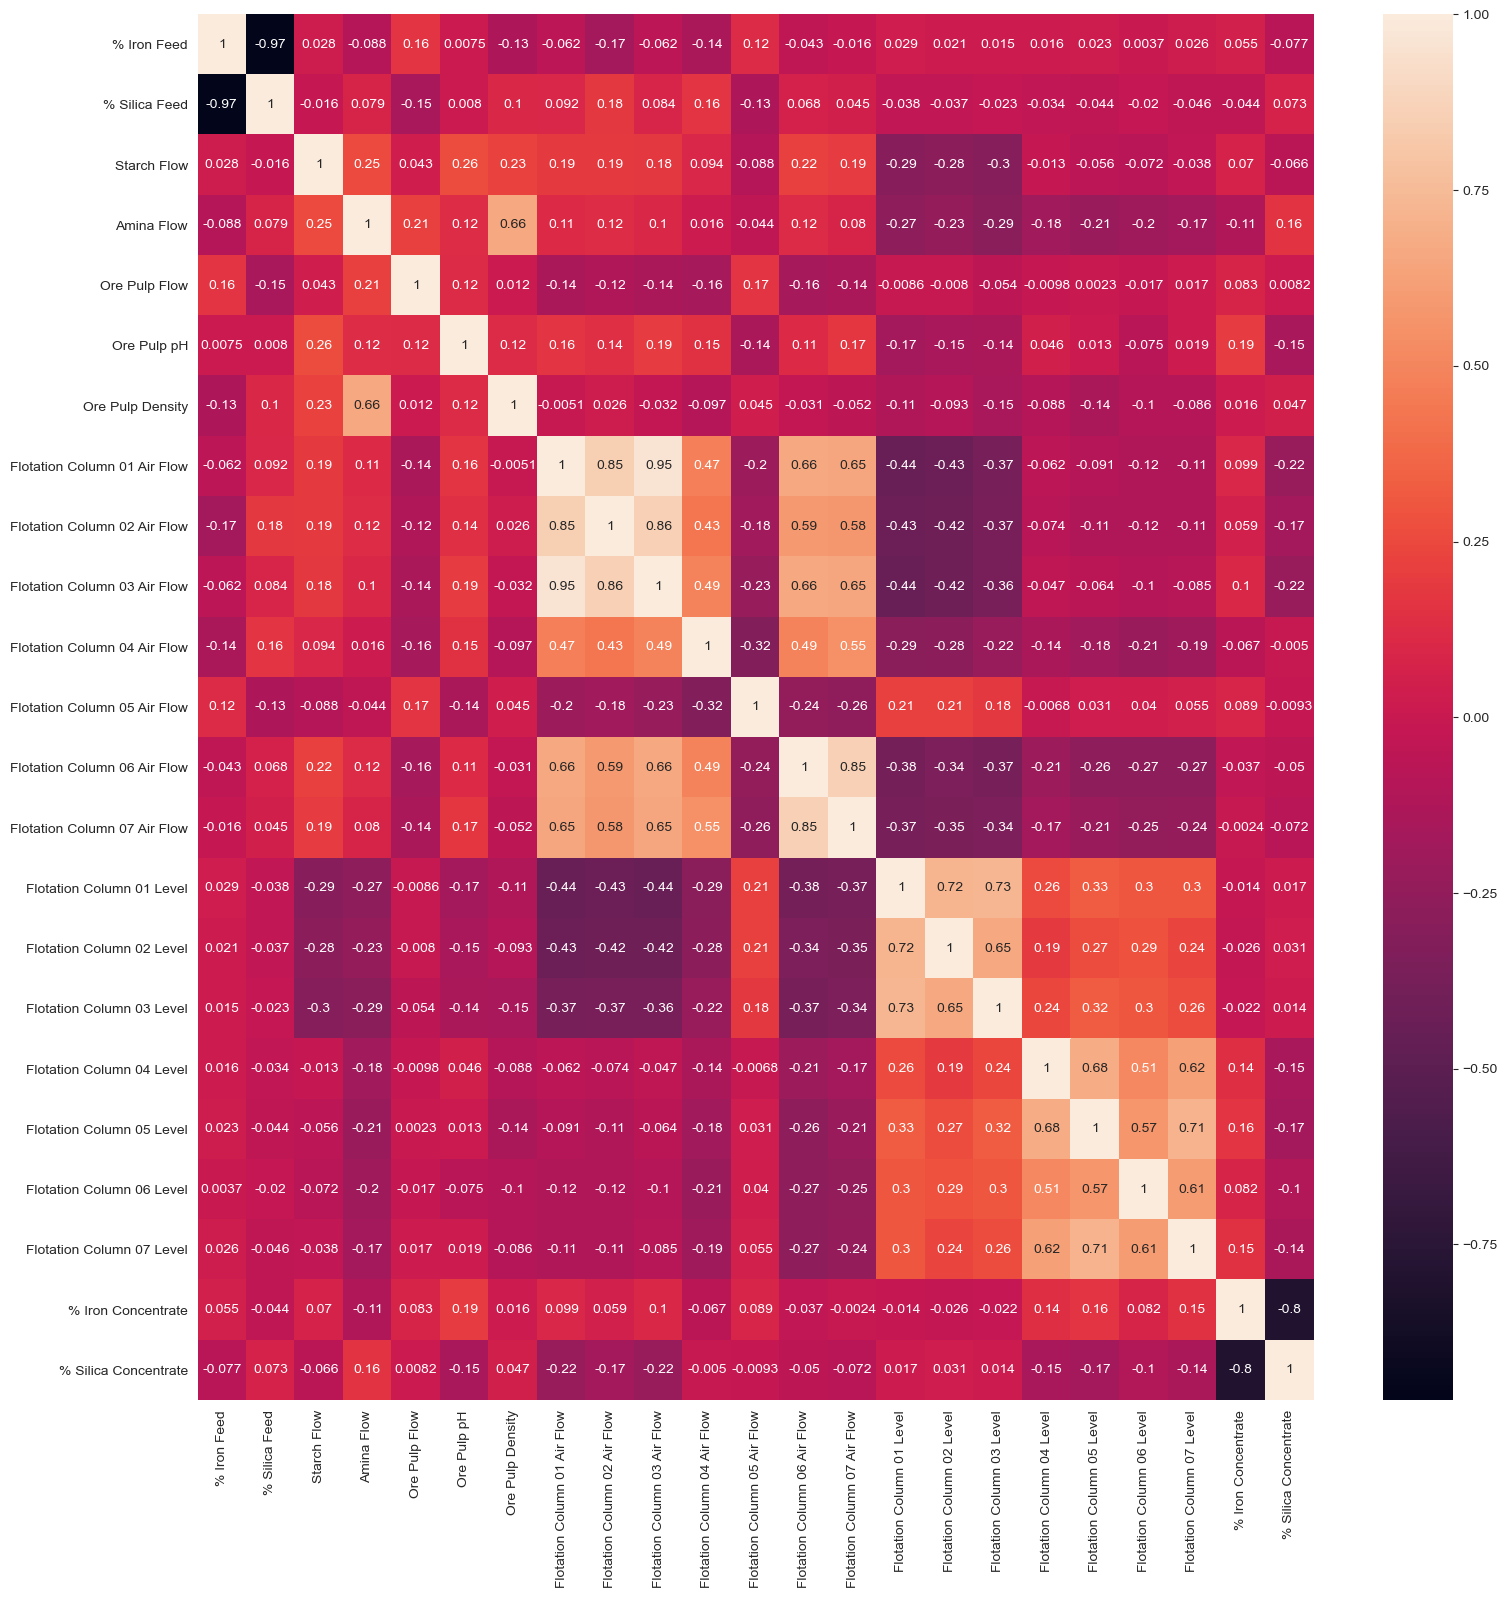

In [10]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show("png")
# Из этой диаграммы можно сделать вывод, что существует взаимосвязь между железным сырьем и кремнеземом. 
# Также существует связь между концентратом кремнезема и концентратом железа.

### Строим и оцениваем модель

In [13]:
from optuna.integration import LightGBMPruningCallback
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import lightgbm as lgbm

EPS = 1e-8

def objective(trial, X, y):
    param_grid = {
        "verbosity": -1,
        "boosting_type": "gbdt",
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.0125, 0.025, 0.05, 0.1]),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2048),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": min(trial.suggest_float("bagging_fraction", 0.3, 1.0 + EPS), 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "feature_fraction": min(trial.suggest_float("feature_fraction", 0.3, 1.0 + EPS), 1.0),
        "feature_pre_filter": False,
        "extra_trees": trial.suggest_categorical("extra_trees", [True, False]),
    }

    cv = KFold(n_splits=5, shuffle=True)

    cv_scores = np.empty(5)
        
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMRegressor( **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="rmse",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "rmse")
            ], 
        )
        preds = model.predict(X_test)
        cv_scores[idx] = mean_squared_error(y_test, preds)

    return np.mean(cv_scores)

In [14]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

[I 2022-02-16 00:20:33,082] A new study created in memory with name: LGBM Classifier


[LightGBM] [Warning] feature_fraction is set=0.9574153157106242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9574153157106242
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_gain_to_split is set=1.5378343401759154, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5378343401759154
[LightGBM] [Warning] lambda_l1 is set=6.28811333822246e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.28811333822246e-05
[LightGBM] [Warning] bagging_fraction is set=0.355287190461954, subsample=1.0 will be ignored. Current value: bagging_fraction=0.355287190461954
[LightGBM] [Warning] lambda_l2 is set=0.00016398186110878828, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016398186110878828
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction 

[I 2022-02-16 00:21:18,808] Trial 0 finished with value: 0.14025787689153654 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1, 'num_leaves': 956, 'max_depth': 4, 'min_data_in_leaf': 14, 'lambda_l1': 6.28811333822246e-05, 'lambda_l2': 0.00016398186110878828, 'min_gain_to_split': 1.5378343401759154, 'bagging_fraction': 0.355287190461954, 'bagging_freq': 6, 'feature_fraction': 0.9574153157106242, 'extra_trees': False}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.40350529939489144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40350529939489144
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] min_gain_to_split is set=13.132093035452588, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.132093035452588
[LightGBM] [Warning] lambda_l1 is set=0.0026622293788963075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026622293788963075
[LightGBM] [Warning] bagging_fraction is set=0.3928261865460708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3928261865460708
[LightGBM] [Warning] lambda_l2 is set=0.007462198036503032, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007462198036503032
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fractio

[I 2022-02-16 00:23:09,678] Trial 1 finished with value: 0.19291742671306192 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0125, 'num_leaves': 294, 'max_depth': 5, 'min_data_in_leaf': 71, 'lambda_l1': 0.0026622293788963075, 'lambda_l2': 0.007462198036503032, 'min_gain_to_split': 13.132093035452588, 'bagging_fraction': 0.3928261865460708, 'bagging_freq': 6, 'feature_fraction': 0.40350529939489144, 'extra_trees': False}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.4035535797024038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4035535797024038
[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] min_gain_to_split is set=1.1860054597109908, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1860054597109908
[LightGBM] [Warning] lambda_l1 is set=1.2664636404741652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2664636404741652
[LightGBM] [Warning] bagging_fraction is set=0.592306685772927, subsample=1.0 will be ignored. Current value: bagging_fraction=0.592306685772927
[LightGBM] [Warning] lambda_l2 is set=0.15324222544874552, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15324222544874552
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2022-02-16 00:37:40,038] Trial 2 finished with value: 0.2184715274642602 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0125, 'num_leaves': 2032, 'max_depth': 6, 'min_data_in_leaf': 72, 'lambda_l1': 1.2664636404741652, 'lambda_l2': 0.15324222544874552, 'min_gain_to_split': 1.1860054597109908, 'bagging_fraction': 0.592306685772927, 'bagging_freq': 1, 'feature_fraction': 0.4035535797024038, 'extra_trees': True}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.9926298210770395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9926298210770395
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] min_gain_to_split is set=11.573423850130839, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.573423850130839
[LightGBM] [Warning] lambda_l1 is set=5.999198218239229e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.999198218239229e-06
[LightGBM] [Warning] bagging_fraction is set=0.3228415183987384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3228415183987384
[LightGBM] [Warning] lambda_l2 is set=0.0001315783219566159, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001315783219566159
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fractio

[I 2022-02-16 00:48:00,070] Trial 3 finished with value: 0.266947324765158 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0125, 'num_leaves': 889, 'max_depth': 5, 'min_data_in_leaf': 51, 'lambda_l1': 5.999198218239229e-06, 'lambda_l2': 0.0001315783219566159, 'min_gain_to_split': 11.573423850130839, 'bagging_fraction': 0.3228415183987384, 'bagging_freq': 1, 'feature_fraction': 0.9926298210770395, 'extra_trees': True}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.3801191879570224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3801191879570224
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] min_gain_to_split is set=11.117092991678815, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.117092991678815
[LightGBM] [Warning] lambda_l1 is set=0.00896967326164591, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00896967326164591
[LightGBM] [Warning] bagging_fraction is set=0.6520228157459307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6520228157459307
[LightGBM] [Warning] lambda_l2 is set=2.1058140425991816e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1058140425991816e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction 

[I 2022-02-16 00:56:37,093] Trial 4 finished with value: 0.2615928434478978 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05, 'num_leaves': 1177, 'max_depth': 6, 'min_data_in_leaf': 93, 'lambda_l1': 0.00896967326164591, 'lambda_l2': 2.1058140425991816e-05, 'min_gain_to_split': 11.117092991678815, 'bagging_fraction': 0.6520228157459307, 'bagging_freq': 2, 'feature_fraction': 0.3801191879570224, 'extra_trees': True}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.7385980594797616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7385980594797616
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_gain_to_split is set=10.27954190866285, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.27954190866285
[LightGBM] [Warning] lambda_l1 is set=1.2275786219131823, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2275786219131823
[LightGBM] [Warning] bagging_fraction is set=0.35728461346531293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35728461346531293
[LightGBM] [Warning] lambda_l2 is set=9.400067915204957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.400067915204957
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-02-16 00:56:49,420] Trial 5 pruned. Trial was pruned at iteration 911.


[LightGBM] [Warning] feature_fraction is set=0.81392461041408, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.81392461041408
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_gain_to_split is set=5.015216796328698, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.015216796328698
[LightGBM] [Warning] lambda_l1 is set=3.870427238882517e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.870427238882517e-08
[LightGBM] [Warning] bagging_fraction is set=0.6324239176495392, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6324239176495392
[LightGBM] [Warning] lambda_l2 is set=0.00029153644107966277, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00029153644107966277
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is

[I 2022-02-16 00:57:30,890] Trial 6 finished with value: 0.1693298259535756 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1, 'num_leaves': 497, 'max_depth': 4, 'min_data_in_leaf': 34, 'lambda_l1': 3.870427238882517e-08, 'lambda_l2': 0.00029153644107966277, 'min_gain_to_split': 5.015216796328698, 'bagging_fraction': 0.6324239176495392, 'bagging_freq': 2, 'feature_fraction': 0.81392461041408, 'extra_trees': False}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.7826939070075203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7826939070075203
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] min_gain_to_split is set=4.918529957361123, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.918529957361123
[LightGBM] [Warning] lambda_l1 is set=1.3341139092572385, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3341139092572385
[LightGBM] [Warning] bagging_fraction is set=0.4782898928348652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4782898928348652
[LightGBM] [Warning] lambda_l2 is set=0.0004739261146327963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004739261146327963
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-02-16 00:57:31,910] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2022-02-16 00:57:39,906] Trial 8 pruned. Trial was pruned at iteration 363.


[LightGBM] [Warning] feature_fraction is set=0.7371565983422341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7371565983422341
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] min_gain_to_split is set=4.840599761350254, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.840599761350254
[LightGBM] [Warning] lambda_l1 is set=0.3934283532190853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3934283532190853
[LightGBM] [Warning] bagging_fraction is set=0.3737922893540568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3737922893540568
[LightGBM] [Warning] lambda_l2 is set=0.4658123862640884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4658123862640884
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.737

[I 2022-02-16 01:11:47,228] Trial 9 finished with value: 0.23516758359521078 and parameters: {'n_estimators': 10000, 'learning_rate': 0.05, 'num_leaves': 1591, 'max_depth': 8, 'min_data_in_leaf': 74, 'lambda_l1': 0.3934283532190853, 'lambda_l2': 0.4658123862640884, 'min_gain_to_split': 4.840599761350254, 'bagging_fraction': 0.3737922893540568, 'bagging_freq': 5, 'feature_fraction': 0.7371565983422341, 'extra_trees': True}. Best is trial 0 with value: 0.14025787689153654.


[LightGBM] [Warning] feature_fraction is set=0.978126829339409, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.978126829339409
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_gain_to_split is set=0.06980772043041306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.06980772043041306
[LightGBM] [Warning] lambda_l1 is set=1.970304366797382e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.970304366797382e-06
[LightGBM] [Warning] bagging_fraction is set=0.9383496311685677, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9383496311685677
[LightGBM] [Warning] lambda_l2 is set=3.183217431386711e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.183217431386711e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction 

[I 2022-02-16 01:16:35,907] Trial 10 finished with value: 0.010530487892629498 and parameters: {'n_estimators': 10000, 'learning_rate': 0.025, 'num_leaves': 628, 'max_depth': 11, 'min_data_in_leaf': 1, 'lambda_l1': 1.970304366797382e-06, 'lambda_l2': 3.183217431386711e-08, 'min_gain_to_split': 0.06980772043041306, 'bagging_fraction': 0.9383496311685677, 'bagging_freq': 7, 'feature_fraction': 0.978126829339409, 'extra_trees': False}. Best is trial 10 with value: 0.010530487892629498.


[LightGBM] [Warning] feature_fraction is set=0.9697790093452954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9697790093452954
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] min_gain_to_split is set=1.3763541293869257, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3763541293869257
[LightGBM] [Warning] lambda_l1 is set=1.502960436171496e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.502960436171496e-06
[LightGBM] [Warning] bagging_fraction is set=0.9482725549860033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9482725549860033
[LightGBM] [Warning] lambda_l2 is set=1.1955182368940814e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1955182368940814e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fractio

[I 2022-02-16 01:18:50,435] Trial 11 finished with value: 0.026821258036089868 and parameters: {'n_estimators': 10000, 'learning_rate': 0.025, 'num_leaves': 647, 'max_depth': 11, 'min_data_in_leaf': 4, 'lambda_l1': 1.502960436171496e-06, 'lambda_l2': 1.1955182368940814e-08, 'min_gain_to_split': 1.3763541293869257, 'bagging_fraction': 0.9482725549860033, 'bagging_freq': 7, 'feature_fraction': 0.9697790093452954, 'extra_trees': False}. Best is trial 10 with value: 0.010530487892629498.


[LightGBM] [Warning] feature_fraction is set=0.9002490295903619, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9002490295903619
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_gain_to_split is set=1.0195859948560377, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.0195859948560377
[LightGBM] [Warning] lambda_l1 is set=2.389602541304515e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.389602541304515e-07
[LightGBM] [Warning] bagging_fraction is set=0.9750970080848099, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9750970080848099
[LightGBM] [Warning] lambda_l2 is set=1.4035277699037544e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4035277699037544e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fract

[I 2022-02-16 01:21:05,501] Trial 12 finished with value: 0.024634217811347787 and parameters: {'n_estimators': 10000, 'learning_rate': 0.025, 'num_leaves': 571, 'max_depth': 11, 'min_data_in_leaf': 23, 'lambda_l1': 2.389602541304515e-07, 'lambda_l2': 1.4035277699037544e-08, 'min_gain_to_split': 1.0195859948560377, 'bagging_fraction': 0.9750970080848099, 'bagging_freq': 7, 'feature_fraction': 0.9002490295903619, 'extra_trees': False}. Best is trial 10 with value: 0.010530487892629498.


[LightGBM] [Warning] feature_fraction is set=0.8757096594137687, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8757096594137687
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=0.14558078537611174, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.14558078537611174
[LightGBM] [Warning] lambda_l1 is set=1.0602455456350502e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0602455456350502e-08
[LightGBM] [Warning] bagging_fraction is set=0.9706016227034865, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9706016227034865
[LightGBM] [Warning] lambda_l2 is set=1.5045609752814444e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5045609752814444e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-02-16 01:21:06,657] Trial 13 pruned. Trial was pruned at iteration 1.
[I 2022-02-16 01:21:07,919] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2022-02-16 01:21:09,037] Trial 15 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] feature_fraction is set=0.8826009628227572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8826009628227572
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] min_gain_to_split is set=7.547960282119365, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.547960282119365
[LightGBM] [Warning] lambda_l1 is set=7.95612017307759e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.95612017307759e-06
[LightGBM] [Warning] bagging_fraction is set=0.9976663086894033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9976663086894033
[LightGBM] [Warning] lambda_l2 is set=3.826509583299855e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.826509583299855e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is

[I 2022-02-16 01:22:45,614] Trial 16 finished with value: 0.0478989831019148 and parameters: {'n_estimators': 10000, 'learning_rate': 0.025, 'num_leaves': 685, 'max_depth': 12, 'min_data_in_leaf': 47, 'lambda_l1': 7.95612017307759e-06, 'lambda_l2': 3.826509583299855e-07, 'min_gain_to_split': 7.547960282119365, 'bagging_fraction': 0.9976663086894033, 'bagging_freq': 7, 'feature_fraction': 0.8826009628227572, 'extra_trees': False}. Best is trial 10 with value: 0.010530487892629498.


[LightGBM] [Warning] feature_fraction is set=0.6542735124606244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6542735124606244
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=0.026155903798809006, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.026155903798809006
[LightGBM] [Warning] lambda_l1 is set=2.938639148040223e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.938639148040223e-05
[LightGBM] [Warning] bagging_fraction is set=0.8681493134388018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8681493134388018
[LightGBM] [Warning] lambda_l2 is set=5.304859856360793e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.304859856360793e-08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2022-02-16 01:22:46,875] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2022-02-16 01:22:48,154] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2022-02-16 01:22:49,500] Trial 19 pruned. Trial was pruned at iteration 1.


In [15]:
print(f"\tНаилучшее значение (rmse): {study.best_value:.5f}")
print(f"\tНаилучшие параметры:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Наилучшее значение (rmse): 0.01053
	Наилучшие параметры:
		n_estimators: 10000
		learning_rate: 0.025
		num_leaves: 628
		max_depth: 11
		min_data_in_leaf: 1
		lambda_l1: 1.970304366797382e-06
		lambda_l2: 3.183217431386711e-08
		min_gain_to_split: 0.06980772043041306
		bagging_fraction: 0.9383496311685677
		bagging_freq: 7
		feature_fraction: 0.978126829339409
		extra_trees: False


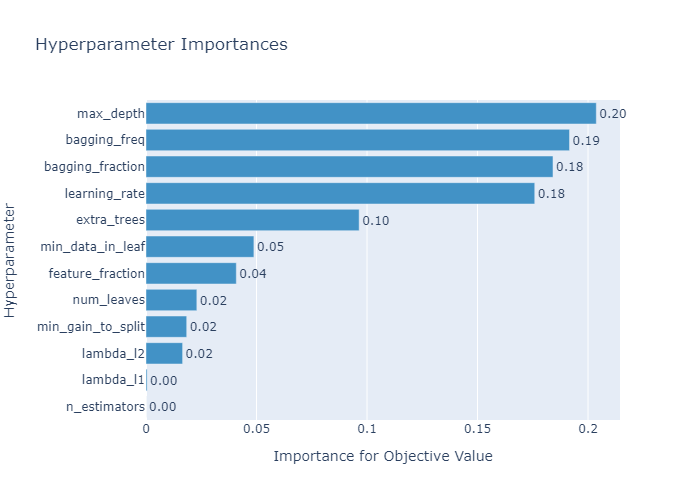

In [22]:
fig = optuna.visualization.plot_param_importances(study)
fig.show("png")

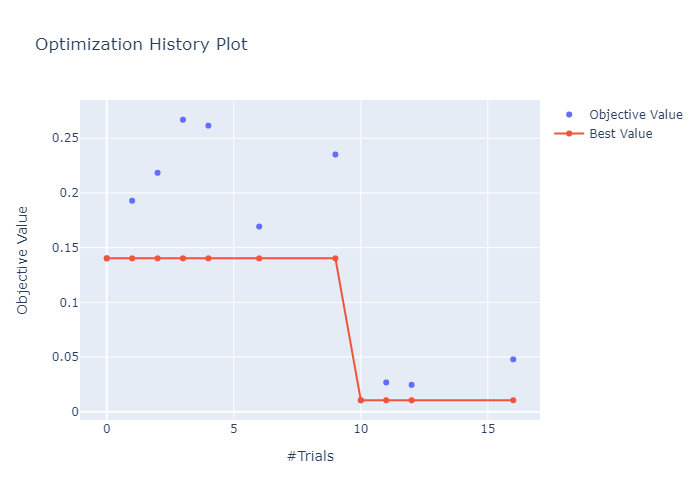

In [23]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show("png")

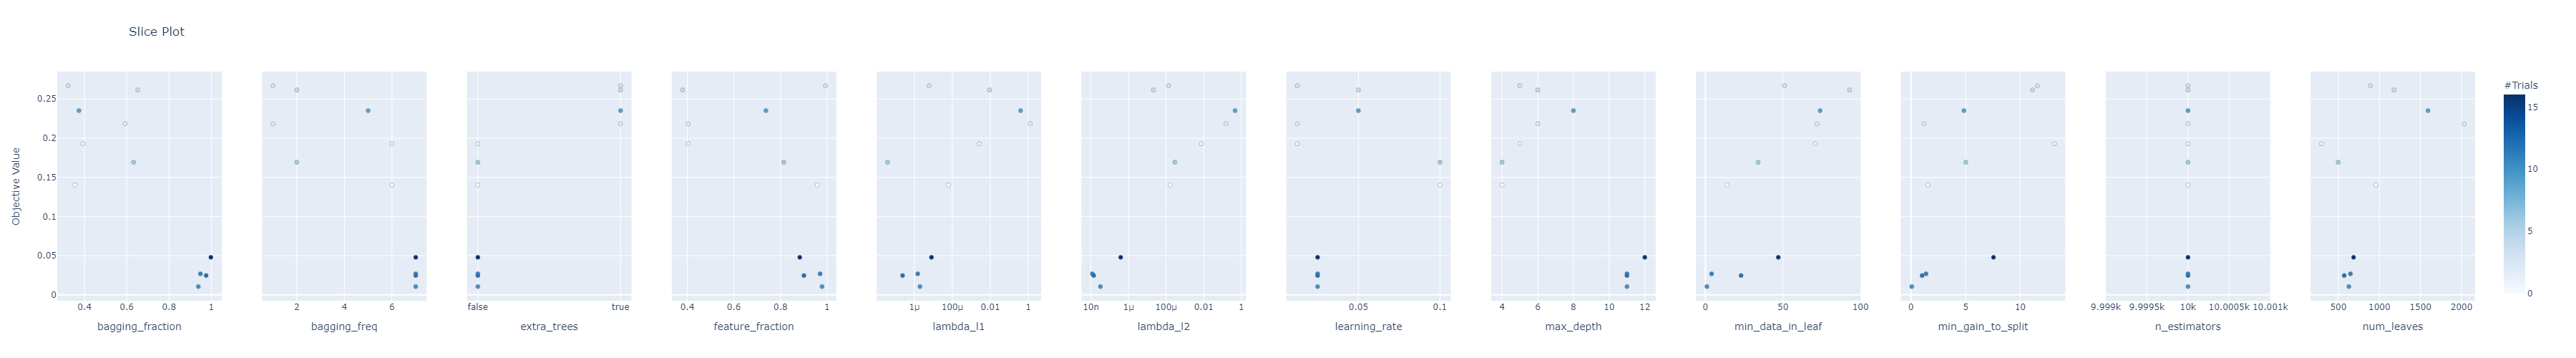

In [24]:
fig = optuna.visualization.plot_slice(study)
fig.show("png")

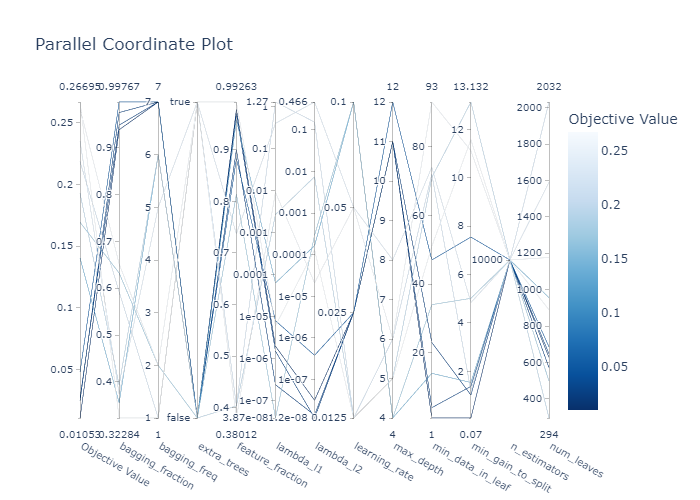

In [25]:
fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show("png")